In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from config import get_cfg
from op import Operation

cfg = get_cfg()

# operation = Operation(cfg)
operation = Operation(cfg)

2020-03-25 16:02:02,493 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:86] - INFO: config:
exp_dir: ./exp
epochs: 256
lr: 0.001
weight_decay: 0.0005
momentum: 0.9
epsilon: 1e-08
dropout: False
is_class_weight: False
data_name: test-brains18
n_classes: 9
batch_size: 30
num_workers: 8
folders: ['1', '5', '7', '4', '148', '070', '14']
is_tumor: False
val_folds: ['1']
train_folds: ['5', '7', '4', '148', '070', '14']
memory_gpu: [0, 11178, 11178, 11178, 11178, 11178, 10449, 10449]
device: cuda:1
cur_dir: ./exp/test-brains18=0325-160201
model_path: ./exp/test-brains18=0325-160201/model.pt
model_all_path: ./exp/test-brains18=0325-160201/model.pth
log_path: ./exp/test-brains18=0325-160201/exp.log
print_cfg: <function print_cfg at 0x7ff403773598>
cfg2str: <function cfg2str at 0x7ff403773510>
log: <Logger ./exp/test-brains18=0325-160201/exp.log (DEBUG)>

2020-03-25 16:02:03,832 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:73] - CRITICAL: criterion: 
CrossEntropyLoss()
2020-03-25 16:02:03

In [ ]:
operation.load(path='./exp/E-CW-brains18=0325-121231/model.pt', mode=True)

In [ ]:
print(operation.model)

In [4]:
operation.ensemble_load_models()

2020-03-25 16:04:15,873 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:481] - INFO: Model loaded from exp/E-brains18=0314-180735/model.pt
2020-03-25 16:04:16,025 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:481] - INFO: Model loaded from exp/E-brains18=0314-182316/model.pt
2020-03-25 16:04:16,171 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:481] - INFO: Model loaded from exp/E-brains18=0314-184617/model.pt
2020-03-25 16:04:16,327 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:481] - INFO: Model loaded from exp/E-brains18=0314-184900/model.pt
2020-03-25 16:04:16,473 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:481] - INFO: Model loaded from exp/E-brains18=0314-191031/model.pt
2020-03-25 16:04:16,634 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:481] - INFO: Model loaded from exp/E-brains18=0314-191616/model.pt
2020-03-25 16:04:16,783 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:481] - INFO: Model loaded from exp/E-brains18=0314-193439/model.pt
2020-03-25 16

In [3]:
dice1, dice2 = operation.eval_sample_model_dices(operation.val_data, False)
dice1, dice2 = operation.eval_sample_model_dices(operation.train_data, False)

[  48/  48] 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| -2020-03-25 16:03:12,110 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:252] - INFO: 
2020-03-25 16:03:12,112 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:253] - INFO: Class     : ['  0', '  1', '  2', '  3', '  4', '  5', '  6', '  7', '  8'] [c1-c8 mean]
2020-03-25 16:03:12,112 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:254] - INFO: Total dice: [0.995, 0.817, 0.927, 0.880, 0.699, 0.811, 0.933, 0.951, 0.933] [0.869]
2020-03-25 16:03:12,113 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:255] - INFO: Bottomdice: [0.993, 0.763, 0.975, 0.881, 0.938, 0.778, 0.864, 0.952, 0.935] [0.886]
2020-03-25 16:03:12,114 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:256] - INFO: Mid   dice: [0.995, 0.850, 0.806, 0.904, 0.347, 0.814, 0.934, 0.900, 0.864] [0.802]
2020-03-25 16:03:12,114 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:257] - INFO: Up    dice: [0.997, 0.837, 1.000, 0.856, 0.813, 0.840, 1.000, 1.0

In [5]:
dice1, dice2 = operation.eval_sample_model_dices(operation.val_data, False)
dice1, dice2 = operation.eval_sample_model_dices(operation.train_data, False)

[  48/  48] 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| -2020-03-25 16:04:45,778 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:252] - INFO: 
2020-03-25 16:04:45,779 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:253] - INFO: Class     : ['  0', '  1', '  2', '  3', '  4', '  5', '  6', '  7', '  8'] [c1-c8 mean]
2020-03-25 16:04:45,780 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:254] - INFO: Total dice: [0.995, 0.817, 0.927, 0.880, 0.698, 0.810, 0.926, 0.952, 0.933] [0.868]
2020-03-25 16:04:45,780 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:255] - INFO: Bottomdice: [0.993, 0.763, 0.975, 0.880, 0.938, 0.775, 0.843, 0.952, 0.934] [0.882]
2020-03-25 16:04:45,781 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:256] - INFO: Mid   dice: [0.995, 0.850, 0.806, 0.904, 0.345, 0.814, 0.935, 0.905, 0.864] [0.803]
2020-03-25 16:04:45,781 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:257] - INFO: Up    dice: [0.997, 0.839, 1.000, 0.857, 0.813, 0.841, 1.000, 1.0

In [ ]:
operation.load_val_data(is_tumor=True)

In [11]:
def show_result(data, ids):
    for i in ids:
        imgs, folder, slice_id = data[i]
        operation.predict(imgs[2], imgs[3], title='{} {}'.format(folder, slice_id))
show_result(operation.val_data, [10])

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [ ]:
def show_result(data, ids):
    for i in ids:
        imgs, folder, slice_id = data[i]
        operation.predict(imgs[2], imgs[3], title='{} {}'.format(folder, slice_id))
show_result(operation.val_data, [20])

(1, 240, 240) float32


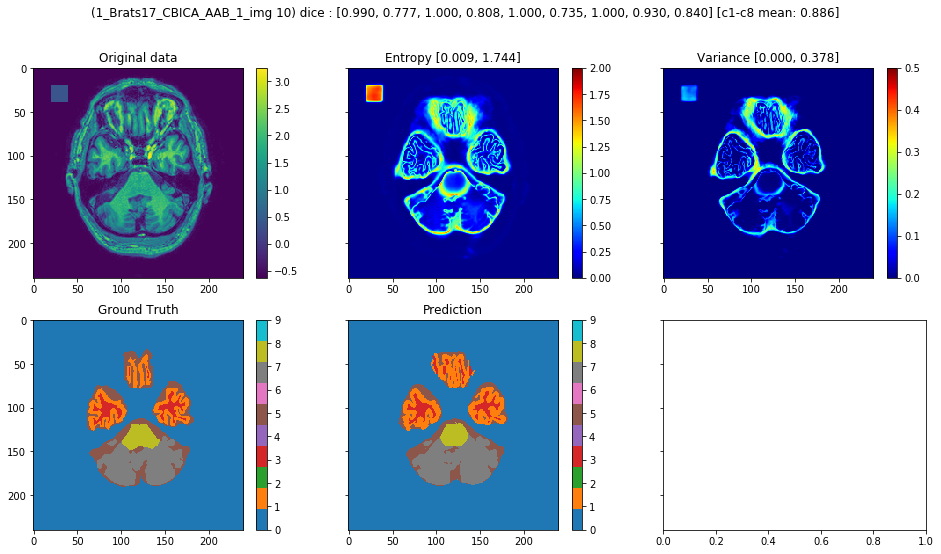

In [92]:
import numpy as np
# noise = np.random.normal(loc=0.0, scale=0, size=(1, 240,240)).astype(np.float32)
noise = np.zeros(shape=(1, 240, 240), dtype=np.float32)
noise[0][20:40, 20:40] += 1
noise[0][80:100, 80:100] += 0
print(noise.shape, noise.dtype)
def show_result(data, ids):
    for i in ids:
        imgs, folder, slice_id = data[i]
        operation.predict_sample(imgs[2] + noise, imgs[3], title='{} {}'.format(folder, slice_id), sample=False)
show_result(operation.val_data, [10])

In [8]:
operation.load_val_data()

In [ ]:
def show_result(data, ids):
    for i in ids:
        imgs, folder, slice_id = data[i]
        operation.predict_sample(imgs[2], imgs[3], title='{} {}'.format(folder, slice_id), sample=True)
show_result(operation.val_data, [20])

In [ ]:
operation.rm_dir()

In [ ]:
operation.fit()

In [ ]:
import numpy as np

ids = np.random.randint(operation.val_data.__len__(), size=1)
show_result(operation.val_data, [20])